In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# Extracting Tesla Stock Data Using yfinance
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period="5y")
    return data

tesla_data = get_stock_data("TSLA")
tesla_data.reset_index(inplace=True)
tesla_data.to_csv("tesla_stock_data.csv", index=False)
print("Tesla Stock Data after resetting index: ")
print(tesla_data.head())

Tesla Stock Data after resetting index: 
                       Date       Open       High        Low      Close  \
0 2020-03-23 00:00:00-04:00  28.906668  29.466667  27.366667  28.952667   
1 2020-03-24 00:00:00-04:00  31.820000  34.245998  31.600000  33.666668   
2 2020-03-25 00:00:00-04:00  36.349998  37.133331  34.074001  35.950001   
3 2020-03-26 00:00:00-04:00  36.492668  37.333332  34.150002  35.210667   
4 2020-03-27 00:00:00-04:00  33.666668  35.053333  32.935333  34.290668   

      Volume  Dividends  Stock Splits  
0  246817500        0.0           0.0  
1  343428000        0.0           0.0  
2  318340500        0.0           0.0  
3  260710500        0.0           0.0  
4  215661000        0.0           0.0  


In [ ]:
# Extracting Tesla Revenue Data Using Webscraping
def get_revenue_data(url, table_index=1):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    tables = soup.find_all("table")
    if len(tables) > table_index:
        df = pd.read_html(str(tables[table_index]))[0]
        return df
    return pd.DataFrame()

tesla_revenue_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_revenue = get_revenue_data(tesla_revenue_url, table_index=1)
print("\nTesla Revenue Data: ")
print(tesla_revenue.head())
print("\nLast 5 rows of Tesla Quarterly Revenue Data:")
print(tesla_revenue.tail())


Tesla Revenue Data: 
Empty DataFrame
Columns: []
Index: []

Last 5 rows of Tesla Quarterly Revenue Data:
Empty DataFrame
Columns: []
Index: []


In [ ]:
# Extracting GameStop Stock Data Using yfinance
gme_data = get_stock_data("GME")
gme_data.reset_index(inplace=True)
gme_data.to_csv("gme_stock_data.csv", index=False)
print("\nGameStop Stock Data after resetting index: ")
print(gme_data.head())


GameStop Stock Data after resetting index: 
                       Date    Open    High     Low   Close    Volume  \
0 2020-03-23 00:00:00-04:00  0.8950  0.9650  0.8750  0.9525  24039200   
1 2020-03-24 00:00:00-04:00  0.9875  1.0525  0.9725  1.0400  27222400   
2 2020-03-25 00:00:00-04:00  1.0375  1.1225  1.0100  1.0425  14368400   
3 2020-03-26 00:00:00-04:00  1.0600  1.1775  1.0600  1.1025  24742800   
4 2020-03-27 00:00:00-04:00  1.2350  1.2725  1.0375  1.0550  28099200   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
# Extracting GameStop Revenue Data Using Webscraping
gme_revenue_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_revenue = get_revenue_data(gme_revenue_url, table_index=1)
print("\nGameStop Revenue Data: ")
print(gme_revenue.head())
print("\nLast 5 rows of GameStop Quarterly Revenue Data:")
print(gme_revenue.tail())


GameStop Revenue Data: 
Empty DataFrame
Columns: []
Index: []

Last 5 rows of GameStop Quarterly Revenue Data:
Empty DataFrame
Columns: []
Index: []


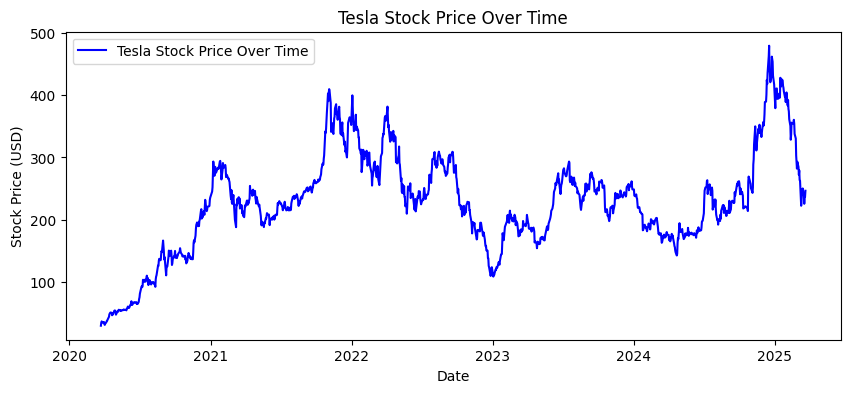

In [ ]:
# Tesla Stock and Revenue Dashboard
def make_graph(data, title, color):
    plt.figure(figsize=(10, 4))
    plt.plot(data['Date'], data['Close'], label=title, color=color)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.show()

make_graph(tesla_data, "Tesla Stock Price Over Time", "blue")

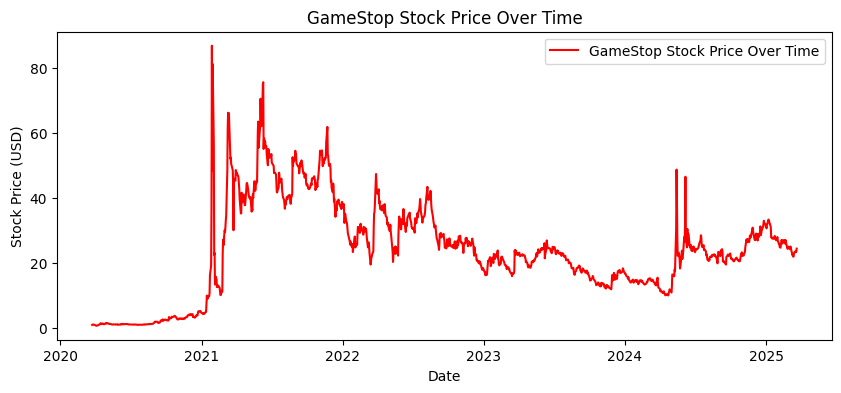

In [ ]:
# GameStop Stock and Revenue Dashboard
make_graph(gme_data, "GameStop Stock Price Over Time", "red")